In [76]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

plt.rcParams['figure.dpi'] = 140

In [2]:
column_names = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'deu_ruim_ou_nao'
    ]

In [3]:
raw_df = pd.read_csv('corrected.csv', header=None, names=column_names)
raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace('.','')

raw_df.head()

C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_13724/1436461904.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack


raw_df.to_csv('raw_df.csv',index=False)

In [1]:
raw_df.info()

NameError: name 'raw_df' is not defined

In [6]:
raw_df.describe(include=object)

,protocol_type,service,flag,deu_ruim_ou_nao
count,311029,311029,311029,311029
unique,3,65,11,38
top,icmp,ecr_i,SF,smurf
freq,164969,164352,248379,164091


In [7]:
raw_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,311029.000000,3.110290e+05,3.110290e+05,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,...,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000,311029.000000
mean,17.902736,1.731702e+03,7.479937e+02,0.000029,0.000762,0.000051,0.014677,0.002363,0.172476,0.011243,...,235.282681,199.193914,0.793494,0.024953,0.547919,0.004566,0.058764,0.058791,0.142659,0.141693
std,407.644400,1.276567e+05,1.612018e+04,0.005379,0.040367,0.009821,0.312068,0.049990,0.377794,1.958325,...,60.913298,100.306470,0.387090,0.096003,0.491963,0.035773,0.231296,0.232997,0.344380,0.346573
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.050000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,244.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57715.000000,6.282565e+07,5.203179e+06,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,796.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
attacks = raw_df['deu_ruim_ou_nao'].value_counts()
x = attacks.index
y = list(attacks)

data = [go.Bar(x=x,
                y=y,
                marker=dict(
                        color='rgb(51,204,153)'
                        ))]
layout = go.Layout(title='Attack Counts',
                    xaxis = {'title':'Attacks'},
                    yaxis=dict(title='Counts'),
                    hovermode='closest')

fig = go.Figure(data=data,layout=layout)
#pyo.plot(fig, filename='Figures/attacks_count.html')
fig.show()

In [9]:
DoS = list([
    'smurf', 'pod', 'neptune', 'teardrop', 'land', 'apache2', 
    'back', 'udpstorm', 'mailbomb', 'processtable'
])

U2R = list([

    'buffer_overflow', 'loadmodule', 'perl', 'rootkit', 'xterm', 'ps', 
    'httptunnel', 'sqlattack', 'worm', 'snmpguess'
])

R2L = list([
    'guess_passwd', 'ftp_write', 'imap', 'phf', 'multihop', 'warezmaster',
    'snmpgetattack',  'named', 'xlock', 'xsnoop', 'sendmail'
])

Probe = list([
    'portsweep', 'ipsweep', 'nmap', 'saint', 'satan', 'mscan'
])

In [10]:
for attack in Probe:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'Probe')
    
for attack in DoS:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'DoS')

for attack in U2R:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'U2R')

for attack in R2L:
    raw_df['deu_ruim_ou_nao']=raw_df['deu_ruim_ou_nao'].str.replace(attack,'R2L')

raw_df.to_csv('attack_cat_raw_df.csv',index=False)

In [12]:
attack_types = raw_df['deu_ruim_ou_nao'].value_counts()
x = attack_types.index
y = list(attack_types)

data = [go.Bar(x=x,
                y=y,
                marker=dict(
                        color='firebrick'
                        ))]
layout = go.Layout(title='Attack Types Counts',
                    xaxis = {'title':'Types of Attacks'},
                    yaxis=dict(title='Counts'),
                    hovermode='closest')

fig = go.Figure(data=data,layout=layout)
#pyo.plot(fig, filename='Figures/attack_types_count.html')
fig.show()

In [35]:
raw_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,R2L
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,R2L


raw_df=pd.read_csv('attack_cat_raw_df.csv')

Text(0.5, 1.0, 'Correlation Heatmap')

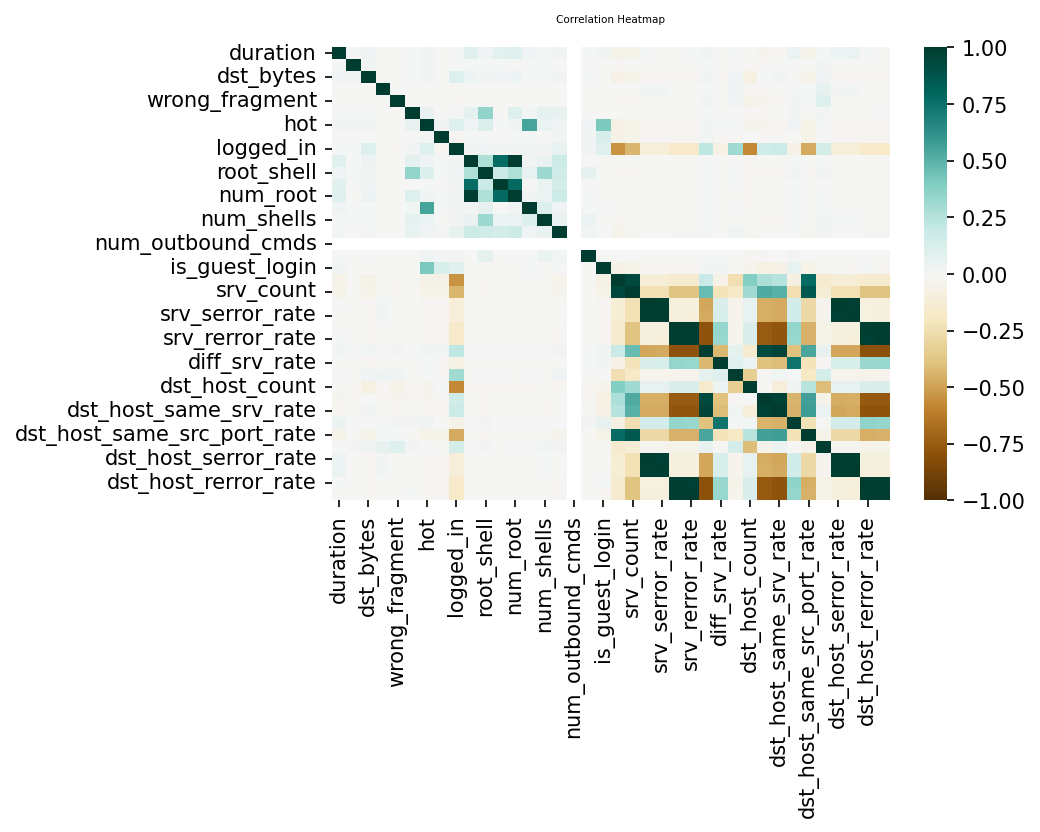

In [43]:
plt.rcParams['figure.dpi'] = 150
heatmap = sns.heatmap(raw_df.corr(), vmin=-1, vmax=1, annot=False, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':5}, pad=12)

In [107]:
categorical_features = list(raw_df.select_dtypes(include=['object']).columns)
numerical_features = list(raw_df.select_dtypes(exclude=['object']).columns)

lab_enc_df = raw_df.copy()

labelencoder = LabelEncoder()

for c in categorical_features:
    lab_enc_df[c] = labelencoder.fit_transform(lab_enc_df[c])

In [108]:
lab_enc_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,deu_ruim_ou_nao
0,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
1,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
2,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
3,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,2
4,0,2,46,9,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,2,46,9,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311025,0,2,46,9,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311026,0,2,46,9,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4
311027,0,2,46,9,105,147,0,0,0,0,...,255,1.0,0.00,0.01,0.0,0.0,0.0,0.0,0.0,4


0 - DoS
4 - Normal
2 - R2L
1 - Probe
3 - U2R

In [109]:
X = lab_enc_df.iloc[:,:-1]
y = lab_enc_df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=50,
                                 random_state=42,
                                 n_jobs=2)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_13724/948185453.py:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



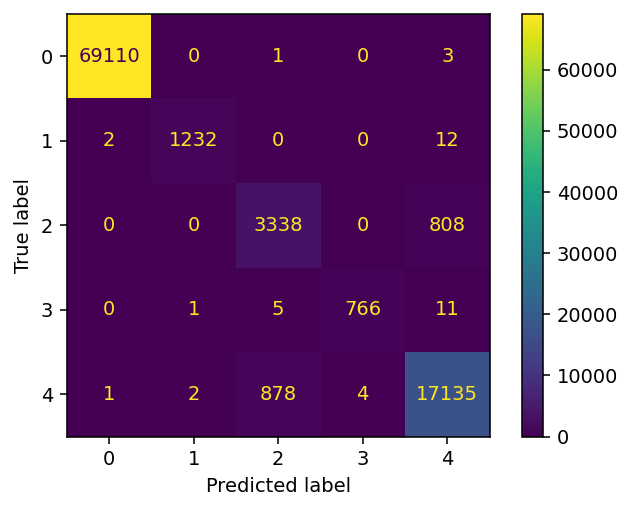


F1 Score: [0.99994936 0.99314792 0.79780115 0.98647778 0.95223541] 
 Accuracy: 0.9814808860881586 



In [110]:
plot_confusion_matrix(forest, X_test, y_test)
plt.show()

print(f'\nF1 Score: {f1_score(y_test, y_pred, average=None)} \n Accuracy: {accuracy_score(y_test, y_pred)} \n')

In [49]:
categorical_features = list(raw_df.select_dtypes(include=['object']).columns)
numerical_features = list(raw_df.select_dtypes(exclude=['object']).columns)
#enc_df = pd.get_dummies(raw_df, columns=['protocol_type','service', 'flag', 'deu_ruim_ou_nao'], prefix=['pt_', 'ser_', 'flag_', 'label_'] )

In [45]:
raw_df=pd.read_csv('attack_cat_raw_df.csv')

In [50]:
scaled_df = raw_df.copy()

col_names = numerical_features
features = scaled_df[col_names]

scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)

scaled_df[col_names] = features

In [63]:
lab_enc_scaled_df = scaled_df.copy()

labelencoder = LabelEncoder()

for c in categorical_features:
    lab_enc_scaled_df[c] = labelencoder.fit_transform(lab_enc_scaled_df[c])

In [68]:
X = lab_enc_scaled_df.iloc[:,:-1]
y = lab_enc_scaled_df.iloc[:,-1:]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

forest = RandomForestClassifier(criterion='entropy',
                                 n_estimators=50,
                                 random_state=42,
                                 n_jobs=2)

forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

C:\Users\SHUBHAM\AppData\Local\Temp/ipykernel_13724/962873125.py:11: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



C:\Users\SHUBHAM\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



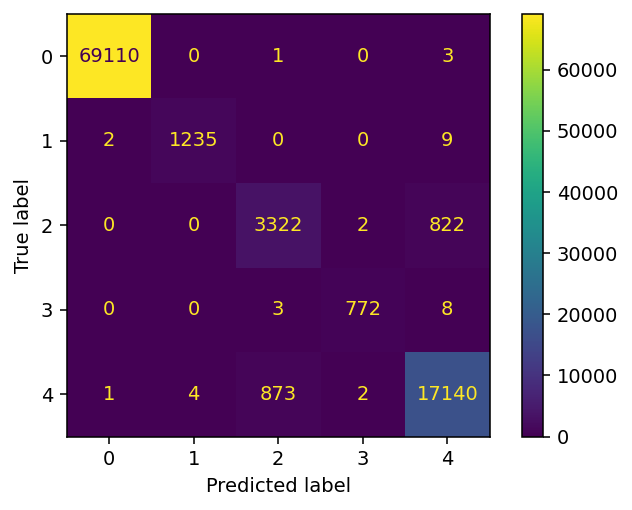


F1 Score: [0.99994936 0.99396378 0.79616537 0.99037845 0.95216932] 
 Accuracy: 0.9814594519285386 



In [106]:
plot_confusion_matrix(forest, X_test, y_test)
plt.show()

print(f'\nF1 Score: {f1_score(y_test, y_pred, average=None)} \n Accuracy: {accuracy_score(y_test, y_pred)} \n')